In [19]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

In [20]:
# Reading in each csv file for the imputed data
data = pd.read_csv('imputed_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,status,pay_method_ACH,pay_method_credit card,pay_method_paper check,state_0,state_1,state_2,state_3,...,prod,income,months,18_months,state,status_0,status_1,status_2,status_3,status_4
0,0,2014.0,Returned < 90 days,0,1,0,0,0,0,0,...,1.0,74467.0,0.87,0,MA,0,0,0,0,1
1,1,2015.0,Returned < 90 days,0,1,0,0,0,0,0,...,1.0,74467.0,0.00,0,MA,0,0,0,0,1
2,2,2016.0,Switched to LW,0,1,0,0,0,0,0,...,1.0,74467.0,0.00,0,MA,0,0,0,1,0
3,3,2016.0,Returned < 90 days,0,1,0,0,0,0,0,...,1.0,74467.0,0.67,0,MA,0,0,0,0,1
4,5,2014.0,Decline,0,1,0,0,0,0,0,...,1.0,55937.0,0.57,0,MA,0,0,0,1,1


In [21]:
# Separating out the y variable and selecting the continuous data that needs to be normalize
Y = data['18_months']
outlier_data = data[['lp_amount', 'income', 'prod']]
data = data.drop(['lp_amount', 'income', 'prod'], axis=1)

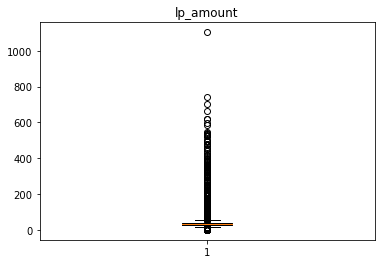

In [22]:
# Creating a boxplot for the 'lp_amount' column
plt.boxplot(outlier_data['lp_amount'])    
# Naming the box plot after the name of the column  
plt.title('lp_amount')
plt.show()

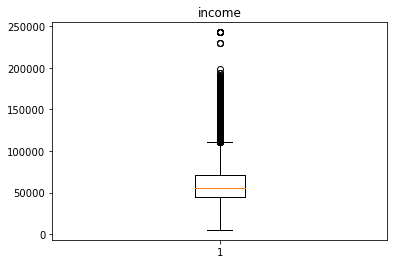

In [23]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

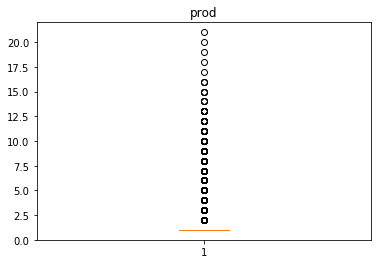

In [24]:
# Creating a boxplot for the 'prod' column
plt.boxplot(outlier_data['prod'])    
# Naming the box plot after the name of the column  
plt.title('prod')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55c082fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55c082f9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55c082f780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55c0897ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55c0897668>],
 'means': []}

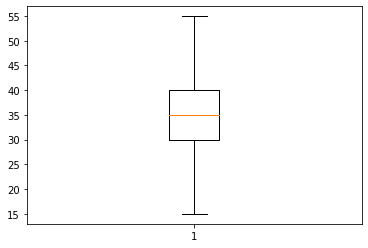

In [25]:
# Defining the function 'outlier' to help with major outliers in the 'lp_amount' column

def outlier(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = outlier_data['lp_amount'].quantile(0.25)
Q3 = outlier_data['lp_amount'].quantile(0.75)
IQR = iqr(outlier_data['lp_amount'])
outlier_data['lp_amount'] = outlier_data['lp_amount'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['lp_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55c04cf9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55c05272b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55c04cf908>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55c05278d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55c0527630>],
 'means': []}

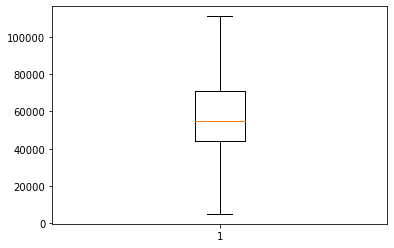

In [26]:
# Using the same definition and method above and apply it to the 'income' column
Q1 = outlier_data['income'].quantile(0.25)
Q3 = outlier_data['income'].quantile(0.75)
IQR = iqr(outlier_data['income'])
outlier_data['income'] = outlier_data['income'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['income'])

In [27]:
outlier_data.mean()

lp_amount       35.185814
income       57642.258229
prod             1.402031
dtype: float64

In [28]:
# Creating the columns names to be inputed into the new normalized data
norm_cols = ['lp_amount', 'income', 'prod']

# Normalizing the two columns in 'outlier_data' using the MinMax function
minmax = preprocessing.MinMaxScaler()
norm = (minmax.fit_transform(outlier_data))
norm = pd.DataFrame(norm, columns=norm_cols)

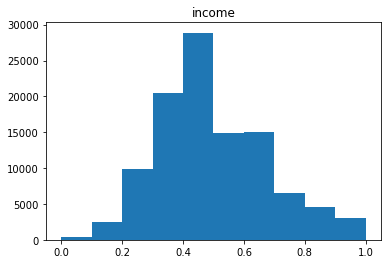

In [29]:
# Creating a histogram for the 'income' column
plt.hist(norm['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

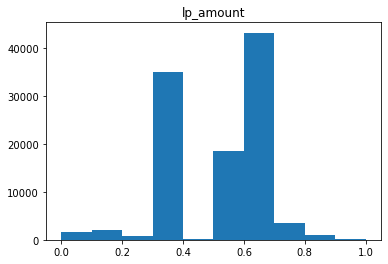

In [30]:
# Creating a histogram for the 'lp_amount' column
plt.hist(norm['lp_amount'])    
# Naming the box plot after the name of the column     
plt.title('lp_amount')
plt.show()

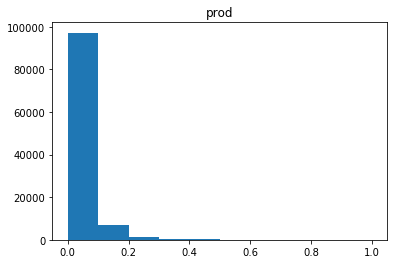

In [31]:
# Creating a histogram for the 'prod' column
plt.hist(norm['prod'])    
# Naming the box plot after the name of the column     
plt.title('prod')
plt.show()

In [32]:
norm.mean()

lp_amount    0.505895
income       0.496311
prod         0.020102
dtype: float64

In [33]:
# Combining the two datasets (first and normalized) back into one
data = pd.concat([data, norm], axis = 1)

# Delelting the 'Unnamed: 0' column
data = data.drop(['Unnamed: 0'], axis = 1)

#Renaming the 18_months column to 'Y'
data['Y'] = data['18_months']
data = data.drop(['18_months'], axis = 1)

data.head()

,year,status,pay_method_ACH,pay_method_credit card,pay_method_paper check,state_0,state_1,state_2,state_3,state_4,...,state,status_0,status_1,status_2,status_3,status_4,lp_amount,income,prod,Y
0,2014.0,Returned < 90 days,0,1,0,0,0,0,0,0,...,MA,0,0,0,0,1,0.500,0.654935,0.0,0
1,2015.0,Returned < 90 days,0,1,0,0,0,0,0,0,...,MA,0,0,0,0,1,0.375,0.654935,0.0,0
2,2016.0,Switched to LW,0,1,0,0,0,0,0,0,...,MA,0,0,0,1,0,0.375,0.654935,0.0,0
3,2016.0,Returned < 90 days,0,1,0,0,0,0,0,0,...,MA,0,0,0,0,1,0.625,0.654935,0.0,0
4,2014.0,Decline,0,1,0,0,0,0,0,0,...,MA,0,0,0,1,1,0.500,0.480234,0.0,0


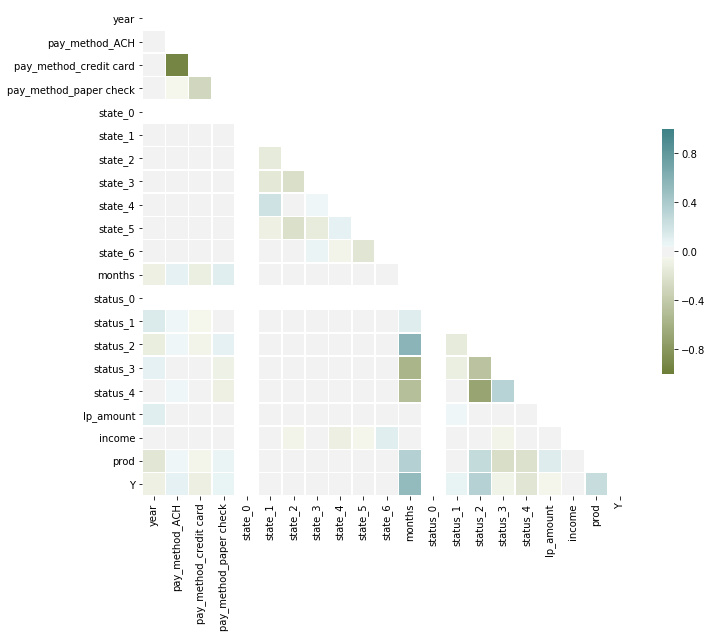

In [34]:
### I AM USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [35]:
print(data.corr(method = 'spearman'))

                            year  pay_method_ACH  pay_method_credit card  \
year                    1.000000        0.038006               -0.023057   
pay_method_ACH          0.038006        1.000000               -0.929943   
pay_method_credit card -0.023057       -0.929943                1.000000   
pay_method_paper check -0.026791       -0.043196               -0.292470   
state_0                      NaN             NaN                     NaN   
state_1                -0.013361        0.006940               -0.005862   
state_2                -0.009748        0.025366               -0.024206   
state_3                 0.020146       -0.014495                0.013892   
state_4                 0.033191        0.017468               -0.016039   
state_5                 0.021754       -0.000532                0.001000   
state_6                -0.011862       -0.015065                0.014084   
months                 -0.094480        0.087347               -0.112795   
status_0    

In [36]:
# Exporting to csv file

data.to_csv("normal_data.csv",",")